# Medical Insurance Price Prediction Using Linear Regression

   In this project, the goal is to develop a machine learning model that can estimate the cost of health insurance coverage for individuals based on certain input variables.

   This project typically involves a dataset that includes features such as age, gender, body mass index (BMI), number of children, smoker status, and region. The target variable is the insurance cost for each individual. The aim is to train a linear regression model that can learn the relationship between these features and the insurance cost.

# Outline 
1. Importing Libraries
2. Loading Dataset
3. Data Analysis & Visualization
4. Data Preprocessing
5. Model Building
6. Evaluation
7. Building a Predictive System

# 1. Importing Libraries

Let us import the required libraries to work with our project

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from utils import *
import math
import copy
from sklearn.model_selection import train_test_split
%matplotlib inline

# 2. Loading Dataset

Loading the data from a csv file named 'Medical Price Dataset' into a Pandas DataFrame

In [13]:
df = pd.read_csv('C:/Users/cgkck/Downloads/FSM Skills Intern/ML/Medical Price Dataset.csv')

# 3. Data Analysis & Visualization

The dataset is analysed in order to find any errors, null values(missing values), outliers and data distribution. Additionally, during this part we can find certain relationships and patterns & trends between variables.

In [107]:
df.head() # This prints the first five rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [106]:
df.tail() # This prints the last five rows of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,2,10600.5483
1334,18,0,31.92,0,0,1,2205.9808
1335,18,0,36.85,0,0,3,1629.8335
1336,21,0,25.80,0,0,4,2007.9450
1337,61,0,29.07,0,1,2,29141.3603


In [21]:
df.shape

(1338, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

After Analysing the data, we came to know that there are no null values in the dataset. This means that we don't have to impute or fill any empty values.

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

There are three categorical features
 - Sex
 - Smoker
 - Region

<Figure size 600x600 with 0 Axes>

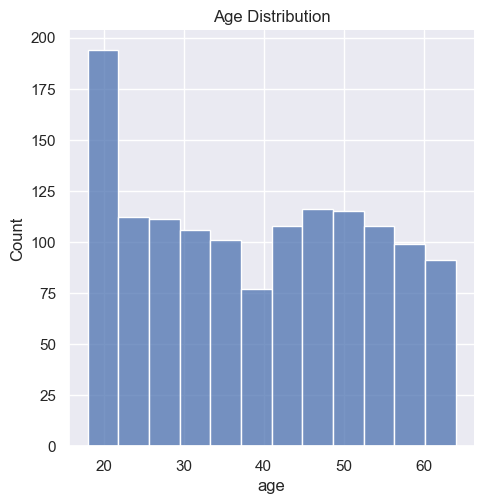

In [48]:
# Age Column

sns.set()
plt.figure(figsize = (6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

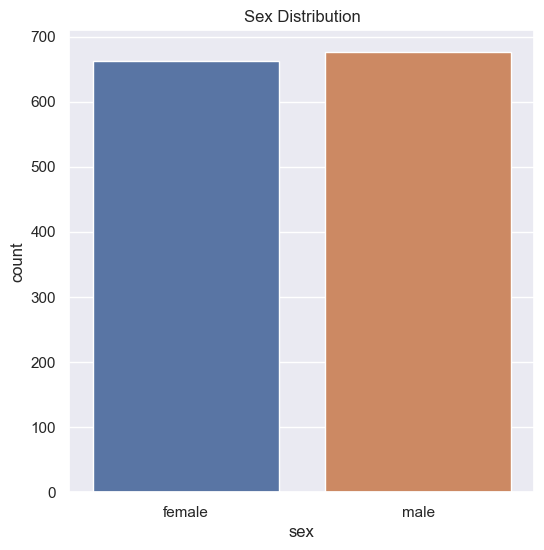

In [49]:
# Sex Column

plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = df)
plt.title('Sex Distribution')
plt.show()

In [50]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

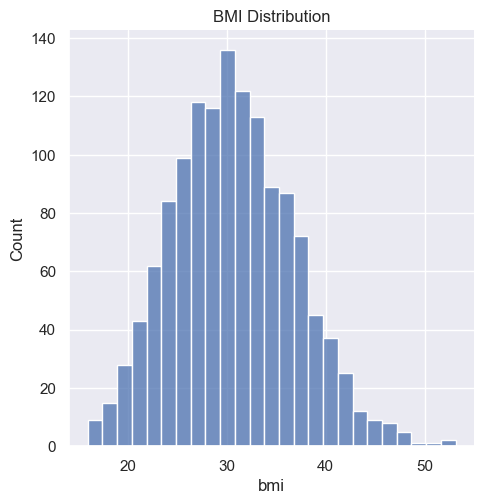

In [51]:
# BMI Column (Normal BMI Range -> 18.5 to 24.9)

plt.figure(figsize = (6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

The BMI Distribution shows that the data is Normally distributed

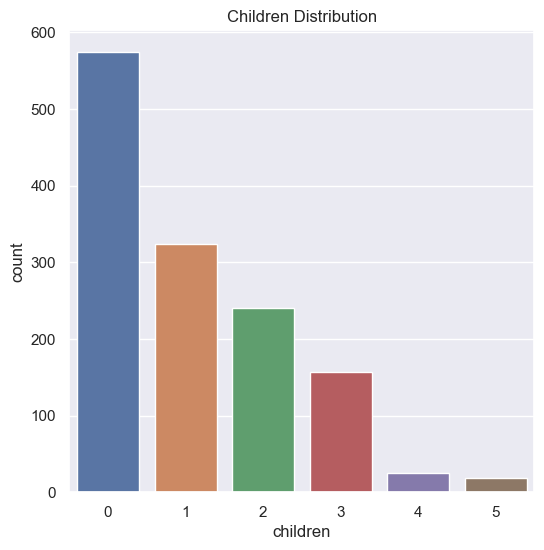

In [52]:
# Children Column

plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.show()

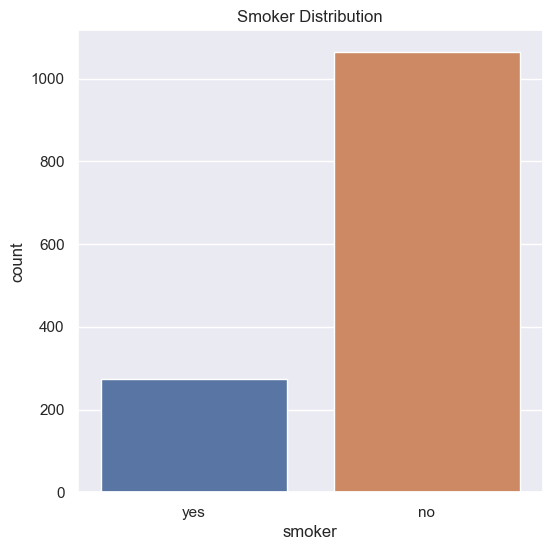

In [53]:
# Smoker Column

plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Distribution')
plt.show()

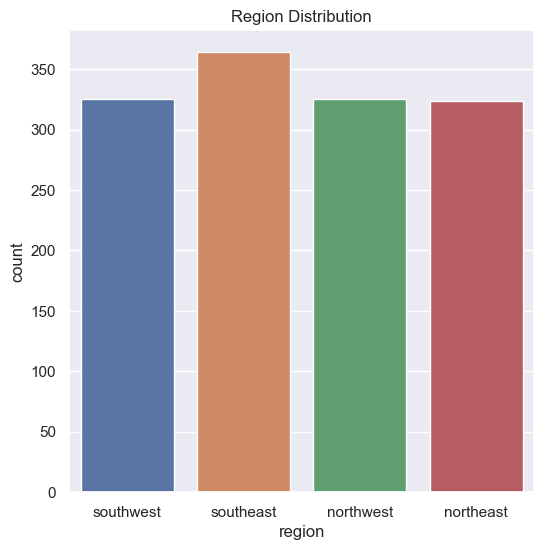

In [54]:
# Region Distribution

plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

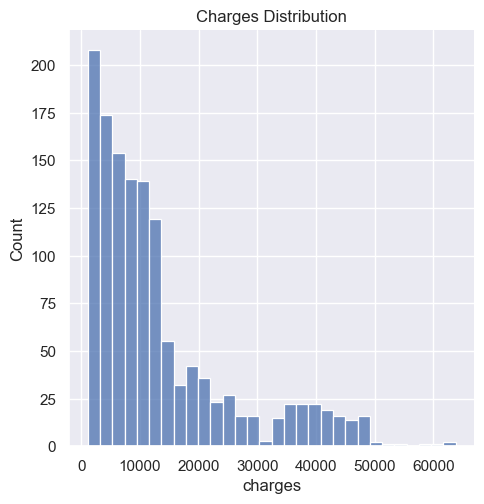

In [55]:
#Charges Distribution

plt.figure(figsize = (6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

Text(0.5, 1.0, 'Region Vs Charges')

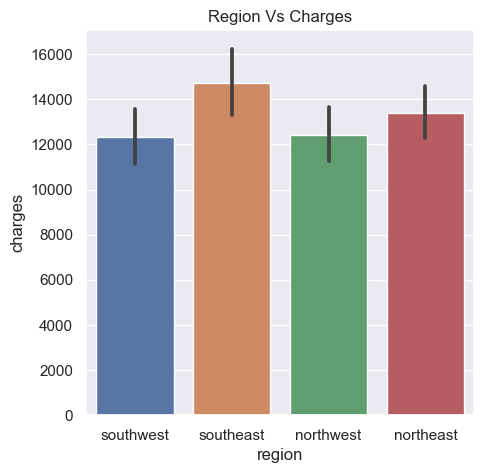

In [56]:
# Region Vs Charges

plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Region Vs Charges')

Text(0.5, 1.0, 'Sex vs Region')

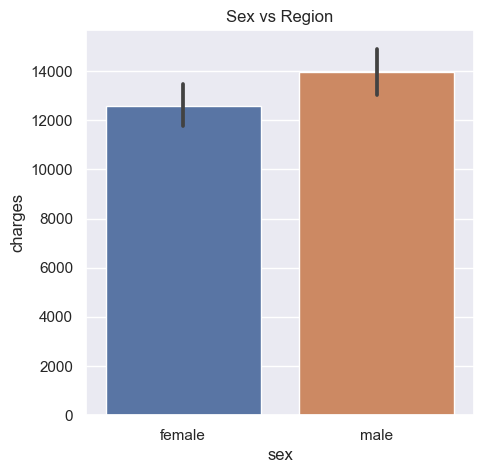

In [57]:
# Sex Vs Charges

plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Sex vs Region')

Text(0.5, 1.0, 'Smoker vs Region')

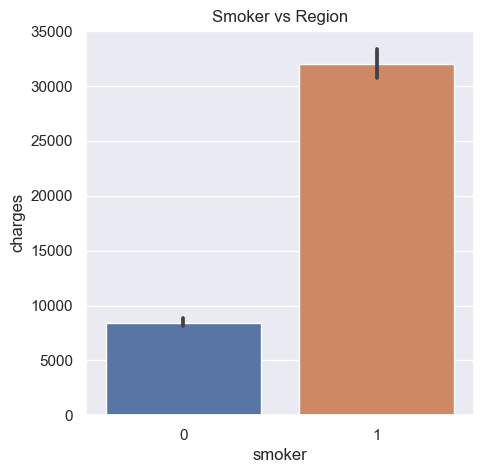

In [105]:
# Smoker Vs Charges
plt.figure(figsize=(5,5))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Region')

Correlation Map - Used to represent the relationships and patterns between two variables

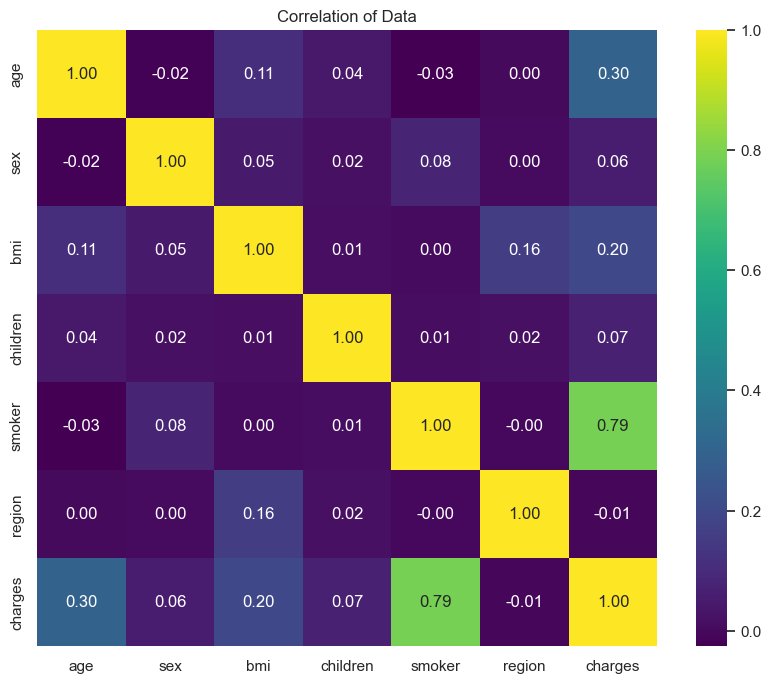

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis',fmt='.2f')
plt.title('Correlation of Data')
plt.show()

# 4 Data Preprocessing

Here, we're encoding some of the categorical variables. [sex, smoker, region]

In [311]:
df.replace(
            {'sex': {'male':1, 'female': 0}, 
             'smoker': {'yes':1, 'no':0}, 
             'region': {'northeast' : 1, 'northwest' : 2, 'southeast':3, 'southwest':4}\
            }, inplace = True)

In [312]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Hence, those features are encoded. Let's do some Normalization

Normalization is a data preprocessing technique that is commonly used in ML. The main purpose of normalization is to bring the data into a consistent and comparable scale, which can help improve the performance and effectiveness of machine learning algorithms. It enables fair comparisons between features, improves algorithm convergence, handles outliers, preserves data distribution, and enhances interpretability. 


In [313]:
X = df.drop(columns = 'charges', axis = 1)
Y = df['charges']

In [314]:
def zscore_normalize_features_X(X):
    # Calculating Mean
    mu_x     = np.mean(X, axis = 0)
    
    # Calculating Standard Deviation
    sigma_x  = np.std(X, axis = 0)
    
    #Normalizing the data
    X_norm = (X - mu_x) / sigma_x
    return (X_norm, mu_x, sigma_x)

In [315]:
def zscore_normalize_features_Y(Y):
    # Calculating Mean
    mu_y   = np.mean(Y, axis = 0)
    
    # Calculating Standard Deviation
    sigma_y  = np.std(Y, axis = 0)
    
    #Normalizing the data
    Y_norm = (Y - mu_y) / sigma_y
    return (Y_norm, mu_y, sigma_y)

In [316]:
X, mu_x, sigma_x = zscore_normalize_features_X(X)
X

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [317]:
Y, mu_y, sigma_y = zscore_normalize_features_Y(Y)

The Data has been normalized now.

<Figure size 600x600 with 0 Axes>

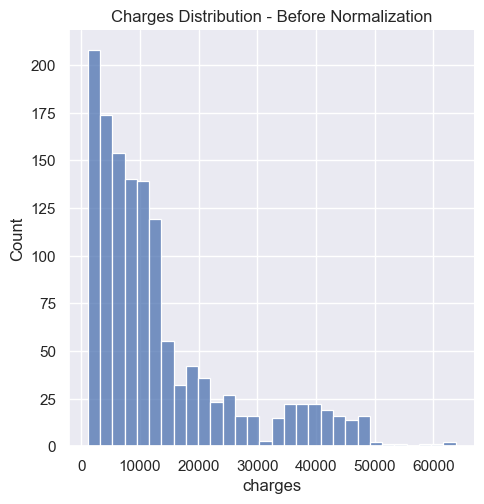

<Figure size 600x600 with 0 Axes>

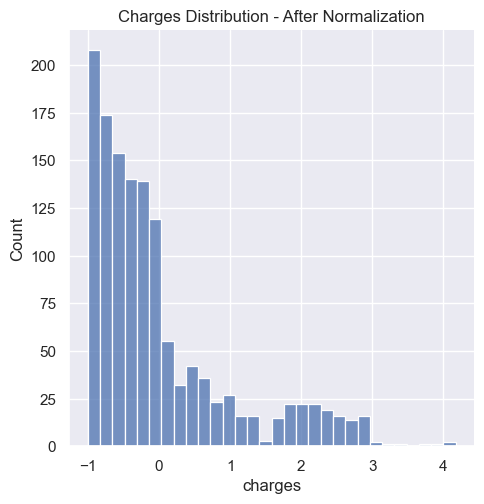

In [318]:
#Comparision between Before Normalization and After Normalization
plt.figure(figsize = (6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution - Before Normalization')
plt.show()

plt.figure(figsize = (6,6))
sns.displot(Y)
plt.title('Charges Distribution - After Normalization')
plt.show()

Therefore, you can see here that the scale of x_axis changed after Normalization.

# 5. Model Building

Splitting the data into train_set and test_set. x_train is used for training the model whereas the x_test is used for evaluating the model

In [319]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
#random_state allows you to specify a particular seed value, which ensures reproducibility of random processes

In [320]:
print(X.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


The dataset has been splitted into 80% for training set and 20% for testing set.

In [321]:
Y.head()

0    0.298584
1   -0.953689
2   -0.728675
3    0.719843
4   -0.776802
Name: charges, dtype: float64

# Linear Regression
In this section, let us find cost_function, gradient_function of the model.

- Cost Function: The cost function, also known as the loss function or objective function, measures the error or mismatch between the predicted values and the actual values. In the case of linear regression, the most commonly used cost function is the Mean Squared Error (MSE), which calculates the average squared difference between the predicted values and the actual values.

- Gradient Function: The gradient function calculates the gradient or derivative of the cost function with respect to the model parameters (slope and intercept in the case of simple linear regression). The gradient points in the direction of the steepest ascent or descent of the cost function. In simple linear regression, you can find the gradient by taking the partial derivatives of the cost function with respect to the model parameters.

There are two hyper-parameters which helps us fine-tuning the gradient descent.

 - Learning Rate: The learning rate (alpha) determines the step size or the amount by which the model parameters are updated during each iteration of the optimization algorithm (e.g., gradient descent). It controls the speed of convergence and can impact the optimization process. It needs to be carefully chosen to ensure proper convergence without overshooting or oscillating around the optimal solution.

 - Number of Iterations: The number of iterations, also known as epochs, refers to the number of times the optimization algorithm updates the model parameters. It determines how many times the algorithm goes through the training data to refine the model. It should be set based on the convergence behavior of the algorithm and can be determined through experimentation or by monitoring the cost function's convergence.



<a name="toc_15456_4"></a>
Compute Cost With Multiple Variables

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{4}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{5}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [322]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias with zeros
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent optimization
        for _ in range(self.num_iterations):
            # Calculate predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) #X.T means Transpose of X
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        #predicts the data
        return np.dot(X, self.weights) + self.bias
    
# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the train data
y_train_pred = model.predict(x_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Print the predictions
print("Predictions:")
print(y_pred)

Predictions:
[-0.94040166 -0.10960308 -0.23249889 -0.89804256 -0.41288019 -0.16823153
 -0.81723228 -1.00762258 -0.09997611 -0.31410923 -0.14669596 -0.67881433
  1.38962259 -1.1149943  -0.04018179  0.01094175 -0.75093567 -0.45685942
  1.34632839 -0.8700685  -0.07662192 -0.94074734  1.71964414  1.5555719
  1.41871718 -0.38301744 -0.90639882  0.17734349 -0.58668156 -0.93570697
 -0.30018576 -0.63010253 -0.76094348 -0.69524565 -0.28948155 -0.70343623
  1.38243609 -0.56716422  1.18221616  0.07265173 -1.08364721  1.21681799
 -0.4581486  -1.00580222 -0.23430927 -0.4653443  -0.14890997 -0.4081951
 -0.19452104  0.01147659 -0.5880829  -1.18951635  1.06492354  1.96008586
 -0.51892023  0.34770052 -1.01193572 -0.17074492 -0.94952321  1.72849973
 -0.14760311 -1.05561478 -0.77739136  1.88179819 -1.21410397  0.08738448
  0.09726277 -0.80315134 -0.01522637 -0.1836905  -0.17143936  0.25182237
 -0.26764714 -0.30961933  0.18600951 -0.10474801 -0.76538993 -0.80620416
 -0.64263272 -0.01173657 -0.37150961 -0.

The predictions have been made using Linear Regression. Let us see the model evaluation.

# 6. Evaluation

 Evaluate the performance of the linear regression model using appropriate evaluation metrics. Common metrics for regression models include mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2) score. These metrics provide insights into the accuracy and goodness of fit of the model.

# Mean Squared Error (MSE):

It measures the average squared difference between the predicted and actual values. Lower values indicate better performance.

In [323]:
# Evaluation
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate the mean squared error for train_set
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error for train_set:", mse_train)

# Calculate the mean squared error for test_set
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for test_set:", mse_test)

Mean Squared Error for train_set: 0.24637260772254
Mean Squared Error for test_set: 0.261801713894024


# Root Mean Squared Error (RMSE): 

It is the square root of the mean squared error and provides a measure of the average difference between the predicted and actual values. It is in the same unit as the target variable, making it more interpretable.

In [324]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error for train_set:", rmse_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error for test_set:", rmse_test)

Root Mean Squared Error for train_set: 0.496359353414983
Root Mean Squared Error for test_set: 0.5116656270397925


# Mean Absolute Error (MAE): 

It measures the average absolute difference between the predicted and actual values. Like RMSE, it is in the same unit as the target variable.

In [325]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error for train_set:", mae_train)

mae_test = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error for test_set:", mae_test)

Mean Absolute Error for train_set: 0.3420023635666227
Mean Absolute Error for test_set: 0.3539860853542703


# R-squared Score (R2 Score):

The R-squared (R2) score is a commonly used metric to evaluate the goodness of fit of a regression model. It measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates a better fit of the model to the data.

In [326]:
def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r2_train = r2_score(y_train, y_train_pred)
print("R-squared (R2) Score for train_set:", r2_train)
r2_test = r2_score(y_test, y_pred)
print("R-squared (R2) Score for test_set:", r2_test)

R-squared (R2) Score for train_set: 0.7519923622524218
R-squared (R2) Score for test_set: 0.7445401996082509


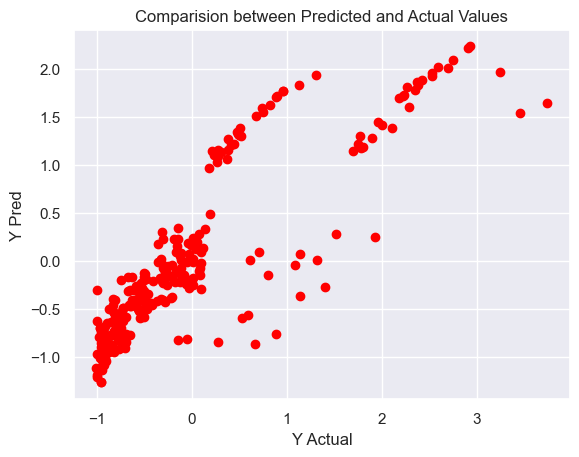

In [327]:
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Comparision between Predicted and Actual Values')
plt.xlabel('Y Actual')
plt.ylabel('Y Pred')
plt.show()

# 7. Building a Predictive System

In [328]:
data = {'age':31, 'sex': 0, 'bmi':25.74, 'children':0, 'smoker':0, 'region':3}
index = [0]
cust_df = pd.DataFrame(data, index)

#De-Normalizing the data
cust_df = (cust_df - mu_x) / sigma_x

#Predicting
cost_pred = model.predict(cust_df)

#De-Normalizing the predicted value
cost_pred = (cost_pred[0] * sigma_y) + mu_y
print("The medical insurance cost of the new customer is: %.2f"%(cost_pred))

The medical insurance cost of the new customer is: 3911.76


The actual value is 3756.62

In [329]:
y_actual = 3756.62
print("The Error % between the actual and predicted value is {:.2f} %.".format(((cost_pred - y_actual) / y_actual) * 100))

The Error % between the actual and predicted value is 4.13 %.


Hence, the linear regression model for the Medical Insurance Cost Prediction has been implemented